# 01- 10 Linear Regression Model


Linear Regression Model:
CPU Usage: 30.20000 MHz
Memory Used: 167.50000 MB
Train RMSE: 6.43709
Test RMSE: 1.00037
Train MAE: 3.10348
Test MAE: 0.78020
Train SMAPE: 5.53211
Test SMAPE: 42.86798
Train R2: 0.98898
Test R2: 0.98988
Execution Time: 0.30272 seconds


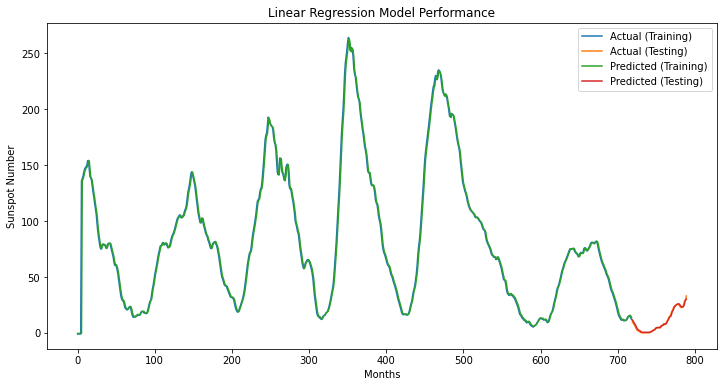

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression


# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
# data = pd.read_csv('/content/SN_m_tot_V2.0.csv', delimiter=';', header=None)
# url = 'https://www.sidc.be/SILSO/INFO/snmtotcsv.php'
url = 'https://www.sidc.be/SILSO/INFO/snmstotcsv.php'
data = pd.read_csv(url, delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Linear Regression model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
    test_smape = 100 * np.mean(2 * np.abs(test_predictions - y_test) / (np.abs(y_test) + np.abs(test_predictions)))
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    # Print evaluation metrics, execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print(f"\nLinear Regression Model:")
    print(f"CPU Usage: {cpu_usage:.5f} MHz")
    print(f"Memory Used: {memory_usage:.5f} MB")
    print(f"Train RMSE: {train_rmse:.5f}")
    print(f"Test RMSE: {test_rmse:.5f}")
    print(f"Train MAE: {train_mae:.5f}")
    print(f"Test MAE: {test_mae:.5f}")
    print(f"Train SMAPE: {train_smape:.5f}")
    print(f"Test SMAPE: {test_smape:.5f}")
    print(f"Train R2: {train_r2:.5f}")
    print(f"Test R2: {test_r2:.5f}")

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Linear Regression model
start_time = time.time()
train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)
computation_time = time.time() - start_time

# Print computation time
print(f"Execution Time: {computation_time:.5f} seconds")

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Linear Regression Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()



Linear Regression Model:
CPU Usage: 22.70000 MHz
Memory Used: 165.78125 MB
Train RMSE: 6.43709
Test RMSE: 1.00037
Train MAE: 3.10348
Test MAE: 0.78020
Train SMAPE: 5.53211
Test SMAPE: 42.86798
Train R2: 0.98898
Test R2: 0.98988
Execution Time: 0.01354 seconds


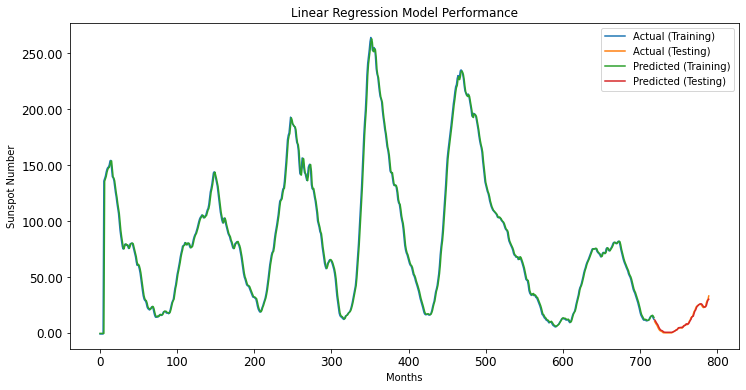

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import FormatStrFormatter

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
url = 'https://www.sidc.be/SILSO/INFO/snmstotcsv.php'
data = pd.read_csv(url, delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Linear Regression model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
    test_smape = 100 * np.mean(2 * np.abs(test_predictions - y_test) / (np.abs(y_test) + np.abs(test_predictions)))
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    # Print evaluation metrics, execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print(f"\nLinear Regression Model:")
    print(f"CPU Usage: {cpu_usage:.5f} MHz")
    print(f"Memory Used: {memory_usage:.5f} MB")
    print(f"Train RMSE: {train_rmse:.5f}")
    print(f"Test RMSE: {test_rmse:.5f}")
    print(f"Train MAE: {train_mae:.5f}")
    print(f"Test MAE: {test_mae:.5f}")
    print(f"Train SMAPE: {train_smape:.5f}")
    print(f"Test SMAPE: {test_smape:.5f}")
    print(f"Train R2: {train_r2:.5f}")
    print(f"Test R2: {test_r2:.5f}")

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Linear Regression model
start_time = time.time()
train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)
computation_time = time.time() - start_time

# Print computation time
print(f"Execution Time: {computation_time:.5f} seconds")

# Plot the predictions with larger axis labels and rounded digits
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Linear Regression Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.xticks(fontsize=12)  # Increase font size of x-axis labels
plt.yticks(fontsize=12)  # Increase font size of y-axis labels
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # Round y-axis labels to two decimal places
plt.legend()
plt.show()



Linear Regression Model:
CPU Usage: 10.10 MHz
Memory Used: 174.21 MB
Train RMSE: 6.44
Test RMSE: 1.00
Train MAE: 3.10
Test MAE: 0.78
Train SMAPE: 5.53
Test SMAPE: 42.87
Train R2: 0.99
Test R2: 0.99
Execution Time: 0.01 seconds


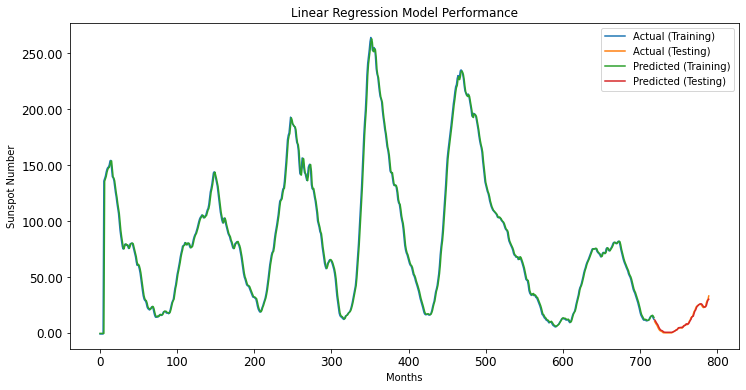

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import FormatStrFormatter

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
url = 'https://www.sidc.be/SILSO/INFO/snmstotcsv.php'
data = pd.read_csv(url, delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Linear Regression model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate evaluation metrics
    train_rmse = round(np.sqrt(mean_squared_error(y_train, train_predictions)), 2)
    test_rmse = round(np.sqrt(mean_squared_error(y_test, test_predictions)), 2)
    train_mae = round(mean_absolute_error(y_train, train_predictions), 2)
    test_mae = round(mean_absolute_error(y_test, test_predictions), 2)
    train_smape = round(100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions))), 2)
    test_smape = round(100 * np.mean(2 * np.abs(test_predictions - y_test) / (np.abs(y_test) + np.abs(test_predictions))), 2)
    train_r2 = round(r2_score(y_train, train_predictions), 2)
    test_r2 = round(r2_score(y_test, test_predictions), 2)

    # Print evaluation metrics, execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = round(psutil.cpu_percent(), 2)
    memory_usage = round(process.memory_info().rss / 1024 / 1024, 2)  # Memory usage in MB
    print(f"\nLinear Regression Model:")
    print(f"CPU Usage: {cpu_usage:.2f} MHz")
    print(f"Memory Used: {memory_usage:.2f} MB")
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Train MAE: {train_mae:.2f}")
    print(f"Test MAE: {test_mae:.2f}")
    print(f"Train SMAPE: {train_smape:.2f}")
    print(f"Test SMAPE: {test_smape:.2f}")
    print(f"Train R2: {train_r2:.2f}")
    print(f"Test R2: {test_r2:.2f}")

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Linear Regression model
start_time = time.time()
train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)
computation_time = round(time.time() - start_time, 2)

# Print computation time
print(f"Execution Time: {computation_time:.2f} seconds")

# Plot the predictions with larger axis labels and rounded digits
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Linear Regression Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.xticks(fontsize=12)  # Increase font size of x-axis labels
plt.yticks(fontsize=12)  # Increase font size of y-axis labels
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # Round y-axis labels to two decimal places
plt.legend()
plt.show()



Linear Regression Model:
CPU Usage: 13.80 MHz
Memory Used: 174.86 MB
Train RMSE: 6.44
Test RMSE: 1.00
Train MAE: 3.10
Test MAE: 0.78
Train SMAPE: 5.53
Test SMAPE: 42.87
Train R2: 0.99
Test R2: 0.99
Execution Time: 0.01 seconds


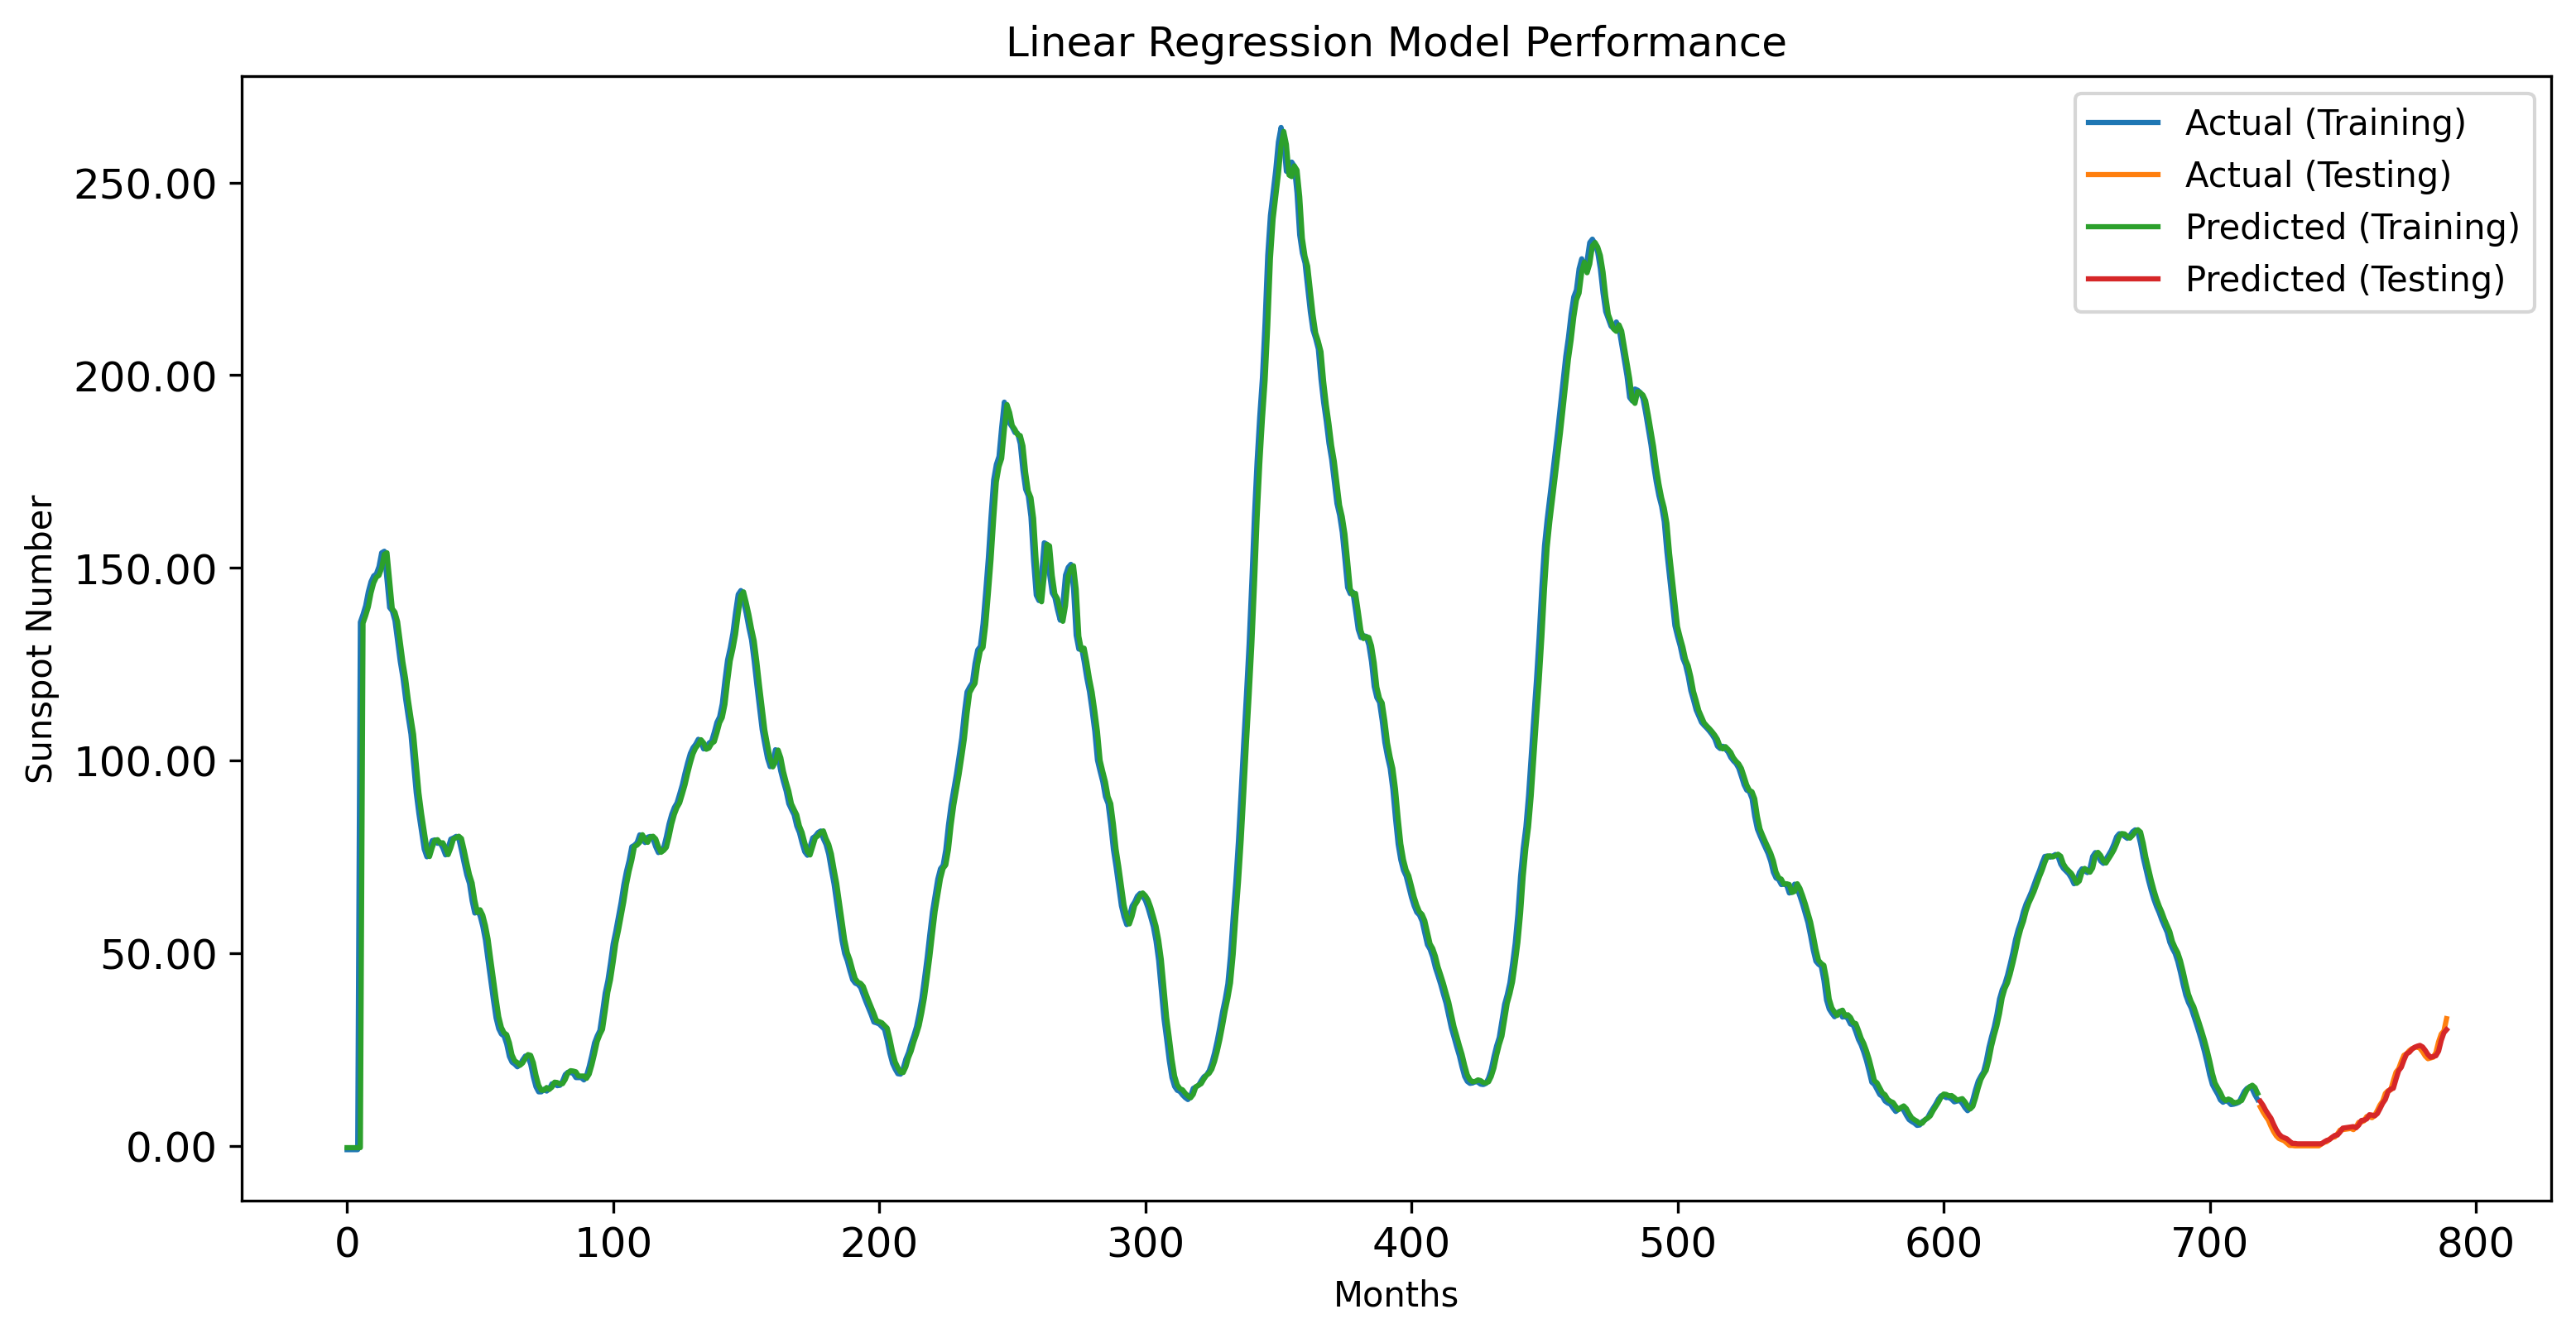

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import FormatStrFormatter

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
url = 'https://www.sidc.be/SILSO/INFO/snmstotcsv.php'
data = pd.read_csv(url, delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Linear Regression model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate evaluation metrics
    train_rmse = round(np.sqrt(mean_squared_error(y_train, train_predictions)), 2)
    test_rmse = round(np.sqrt(mean_squared_error(y_test, test_predictions)), 2)
    train_mae = round(mean_absolute_error(y_train, train_predictions), 2)
    test_mae = round(mean_absolute_error(y_test, test_predictions), 2)
    train_smape = round(100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions))), 2)
    test_smape = round(100 * np.mean(2 * np.abs(test_predictions - y_test) / (np.abs(y_test) + np.abs(test_predictions))), 2)
    train_r2 = round(r2_score(y_train, train_predictions), 2)
    test_r2 = round(r2_score(y_test, test_predictions), 2)

    # Print evaluation metrics, execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = round(psutil.cpu_percent(), 2)
    memory_usage = round(process.memory_info().rss / 1024 / 1024, 2)  # Memory usage in MB
    print(f"\nLinear Regression Model:")
    print(f"CPU Usage: {cpu_usage:.2f} MHz")
    print(f"Memory Used: {memory_usage:.2f} MB")
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Train MAE: {train_mae:.2f}")
    print(f"Test MAE: {test_mae:.2f}")
    print(f"Train SMAPE: {train_smape:.2f}")
    print(f"Test SMAPE: {test_smape:.2f}")
    print(f"Train R2: {train_r2:.2f}")
    print(f"Test R2: {test_r2:.2f}")

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Linear Regression model
start_time = time.time()
train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)
computation_time = round(time.time() - start_time, 2)

# Print computation time
print(f"Execution Time: {computation_time:.2f} seconds")

# Plot the predictions with larger axis labels and rounded digits
plt.figure(figsize=(12, 6), dpi=300)  # Increase dpi for higher quality
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Linear Regression Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.xticks(fontsize=12)  # Increase font size of x-axis labels
plt.yticks(fontsize=12)  # Increase font size of y-axis labels
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # Round y-axis labels to two decimal places
plt.legend()
plt.savefig('linear_regression_performance.png', dpi=300, bbox_inches='tight')  # Save the plot with higher dpi
plt.show()


# 02-10 - SVR


SVR Model:
Execution Time: 0.02713 seconds
CPU Usage: 61.30000 MHz
Memory Used: 818.02344 MB
Train RMSE: 18.61244
Test RMSE: 21.62038
Train MAE: 17.00645
Test MAE: 21.04570
Train SMAPE: 32.90802
Test SMAPE: 121.39282
Train R2: 0.90784
Test R2: -3.72595


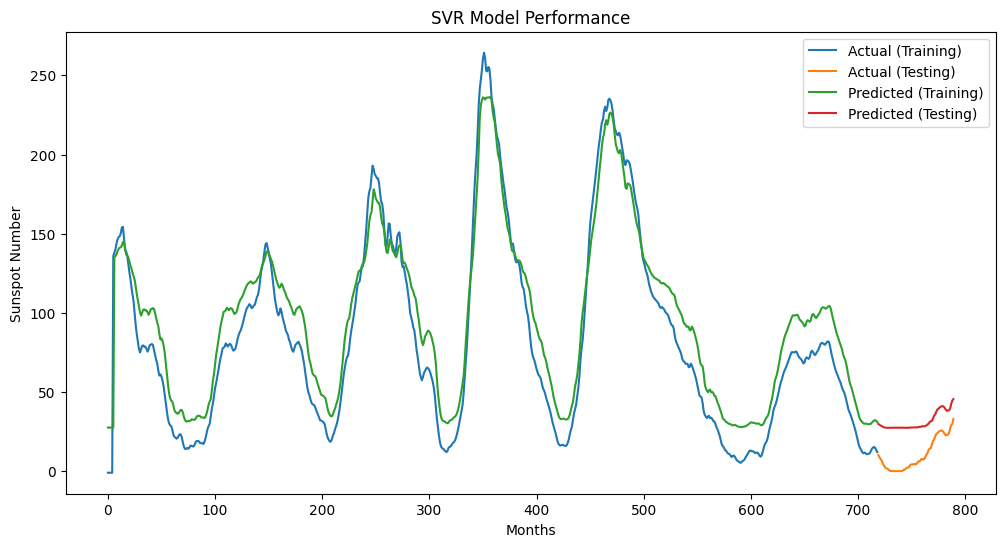

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
# data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
# url = 'https://www.sidc.be/SILSO/INFO/snmtotcsv.php'
url = 'https://www.sidc.be/SILSO/INFO/snmstotcsv.php'
data = pd.read_csv(url, delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the SVR model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the SVR model
    model = SVR()
    model.fit(X_train, y_train.ravel())

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
    test_smape = 100 * np.mean(2 * np.abs(test_predictions - y_test) / (np.abs(y_test) + np.abs(test_predictions)))
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    # Print evaluation metrics, execution time, CPU usage, and memory usage
    process = psutil.Process()
    cpu_usage = psutil.cpu_percent()
    memory_usage = process.memory_info().rss / 1024 / 1024  # Memory usage in MB
    print("\nSVR Model:")
    print(f"Execution Time: {computation_time:.5f} seconds")
    print(f"CPU Usage: {cpu_usage:.5f} MHz")
    print(f"Memory Used: {memory_usage:.5f} MB")
    print(f"Train RMSE: {train_rmse:.5f}")
    print(f"Test RMSE: {test_rmse:.5f}")
    print(f"Train MAE: {train_mae:.5f}")
    print(f"Test MAE: {test_mae:.5f}")
    print(f"Train SMAPE: {train_smape:.5f}")
    print(f"Test SMAPE: {test_smape:.5f}")
    print(f"Train R2: {train_r2:.5f}")
    print(f"Test R2: {test_r2:.5f}")

    return train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the SVR model
start_time = time.time()
train_rmse, test_rmse, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)
computation_time = time.time() - start_time

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('SVR Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 03- 10 - AdaBoost

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Model:
Train RMSE: 6.96496
Test RMSE: 16.33777

Train MAE: 4.38990
Test MAE: 13.48967
Train SMAPE: 10.98003
Test SMAPE: 99.77785
Train R2: 0.98710
Test R2: -1.69866

System Information:
Execution Time: 0.02661 seconds
CPU Usage: 45.3 MHz
Memory Used: 1727.66 MB



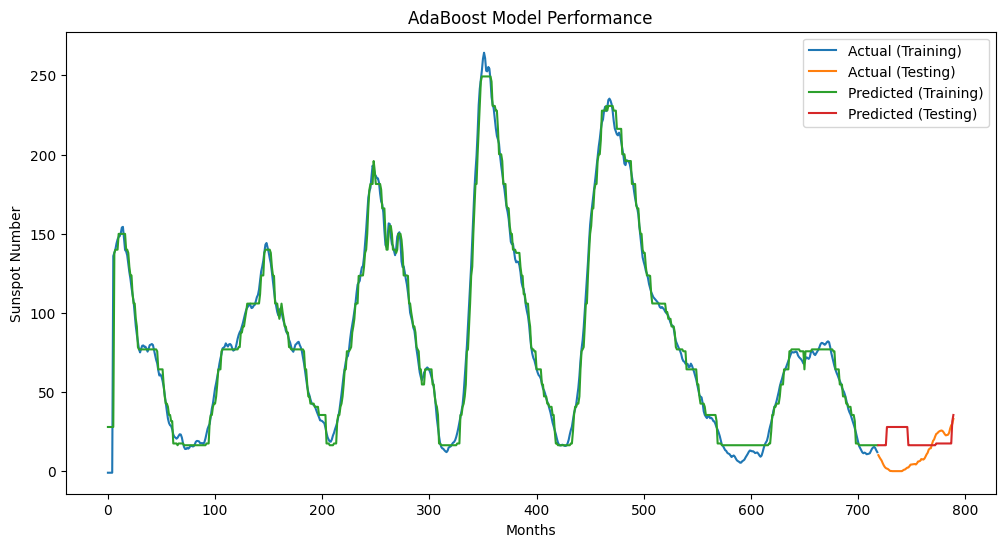

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import psutil
import time

# Set a random seed for reproducibility
np.random.seed(42)


# Load the data
# data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
# url = 'https://www.sidc.be/SILSO/INFO/snmtotcsv.php'
url = 'https://www.sidc.be/SILSO/INFO/snmstotcsv.php'
data = pd.read_csv(url, delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the AdaBoost model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the AdaBoost model
    base_estimator = DecisionTreeRegressor(max_depth=4)  # Base estimator
    model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate additional evaluation metrics
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
    test_smape = 100 * np.mean(2 * np.abs(test_predictions - y_test) / (np.abs(y_test) + np.abs(test_predictions)))
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the AdaBoost model
start_time = time.time()
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)
end_time = time.time()
execution_time = end_time - start_time

# Calculate CPU usage and memory usage
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results and plot the predictions
print("AdaBoost Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print()
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.1f} MHz")
print(f"Memory Used: {memory_usage:.2f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('AdaBoost Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 04- 10 : Stacked LSTM Model

3/3 [==============================] - 0s 5ms/step
Stacked LSTM Model:
Train RMSE: 6.43768
Test RMSE: 1.96163
Train MAE: 3.27071
Test MAE: 1.76493
Train SMAPE: 7.72034
Test SMAPE: 29.27956
Train R2: 0.98898
Test R2: 0.96110

System Information:
Execution Time: 16.44413 seconds
CPU Usage: 42.80000 MHz
Memory Used: 1780.75781 MB



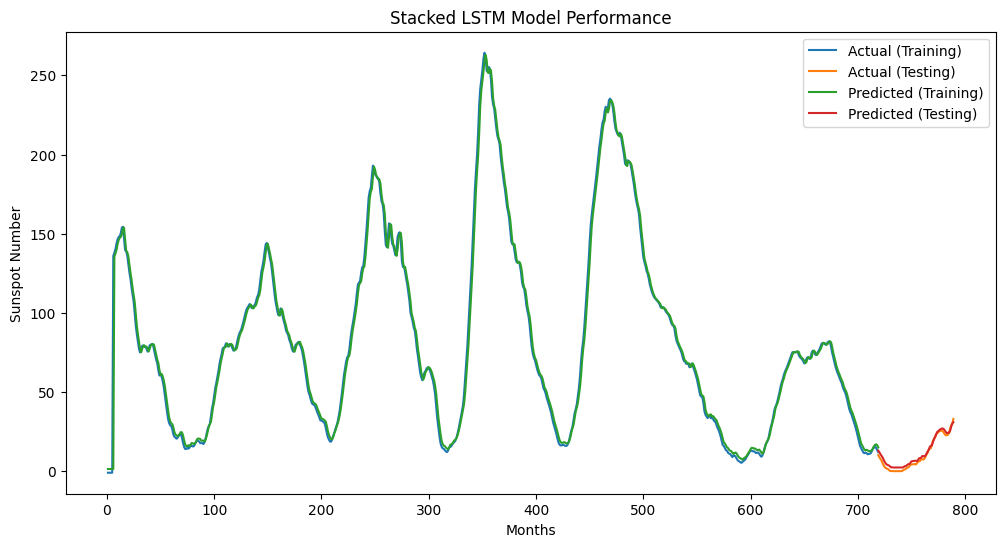

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import psutil
import time

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
# data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
# url = 'https://www.sidc.be/SILSO/INFO/snmtotcsv.php'
url = 'https://www.sidc.be/SILSO/INFO/snmstotcsv.php'
data = pd.read_csv(url, delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Stacked LSTM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for LSTM
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build the Stacked LSTM model
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(1, 1)))
    model.add(LSTM(64))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the Stacked LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Measure execution time
start_time = time.time()

# Train and evaluate the Stacked LSTM model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Calculate execution time
execution_time = time.time() - start_time

# Get system information
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results
print("Stacked LSTM Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Stacked LSTM Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 05- 10 LSTM

3/3 [==============================] - 0s 4ms/step
LSTM Model:
Train RMSE: 6.48947
Test RMSE: 1.74004
Train MAE: 3.14329
Test MAE: 1.52419
Train SMAPE: 11.62315
Test SMAPE: 28.03741
Train R2: 0.98880
Test R2: 0.96939

System Information:
Execution Time: 11.31116 seconds
CPU Usage: 34.00000 MHz
Memory Used: 1654.51562 MB



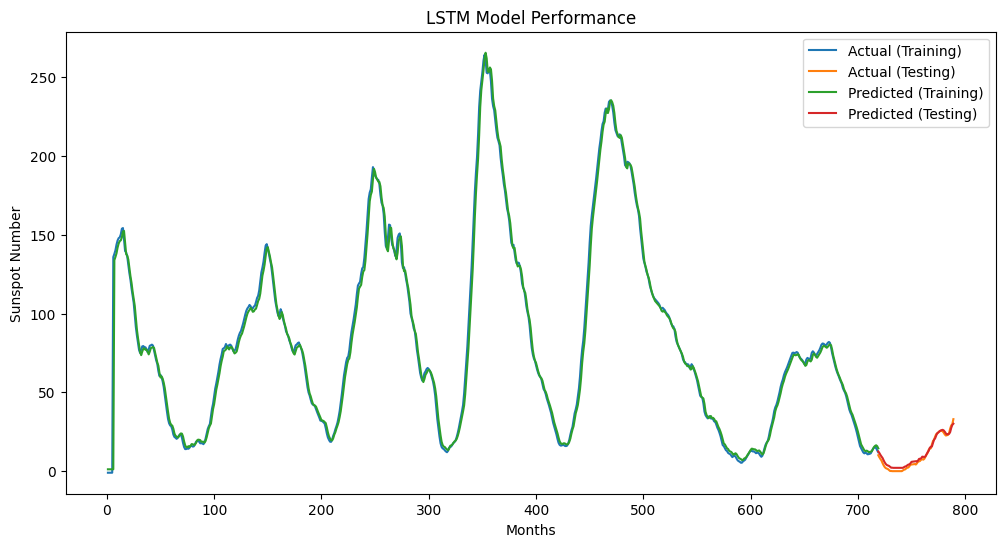

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import psutil
import time

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
# data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
# url = 'https://www.sidc.be/SILSO/INFO/snmtotcsv.php'
url = 'https://www.sidc.be/SILSO/INFO/snmstotcsv.php'
data = pd.read_csv(url, delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the LSTM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for LSTM
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Measure execution time
start_time = time.time()

# Train and evaluate the LSTM model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Calculate execution time
execution_time = time.time() - start_time

# Get system information
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results
print("LSTM Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('LSTM Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 06- 10 : Bidirectional LSTM Model

3/3 [==============================] - 0s 4ms/step
Bidirectional LSTM Model:
Train RMSE: 6.42923
Test RMSE: 1.69472
Train MAE: 3.21520
Test MAE: 1.50451
Train SMAPE: 123.11604
Test SMAPE: 27.83073
Train R2: 0.98900
Test R2: 0.97096

System Information:
Execution Time: 15.62303 seconds
CPU Usage: 71.70000 MHz
Memory Used: 1675.19531 MB



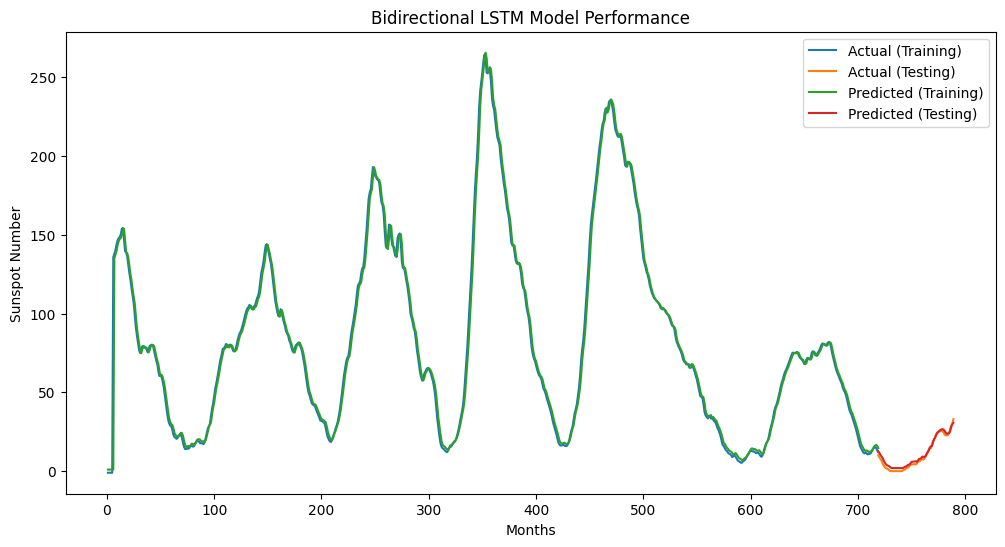

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
import psutil
import time

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
# data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
# url = 'https://www.sidc.be/SILSO/INFO/snmtotcsv.php'
url = 'https://www.sidc.be/SILSO/INFO/snmstotcsv.php'
data = pd.read_csv(url, delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Bidirectional LSTM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for LSTM
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build the Bidirectional LSTM model
    model = Sequential()
    model.add(Bidirectional(LSTM(64), input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the Bidirectional LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions

# Measure execution time
start_time = time.time()

# Train and evaluate the Bidirectional LSTM model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Calculate execution time
execution_time = time.time() - start_time

# Get system information
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results
print("Bidirectional LSTM Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Bidirectional LSTM Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 07 - 10 GRU Model

3/3 [==============================] - 0s 4ms/step
GRU Model:
Train RMSE: 6.46388
Test RMSE: 1.13711
Train MAE: 3.05227
Test MAE: 0.81263
Train SMAPE: 2.46472
Test SMAPE: 21.88456
Train R2: 0.98889
Test R2: 0.98693
Computation Time: 15.71237 seconds
CPU Usage: 56.30 MHz
Memory Used: 1767.89 MB


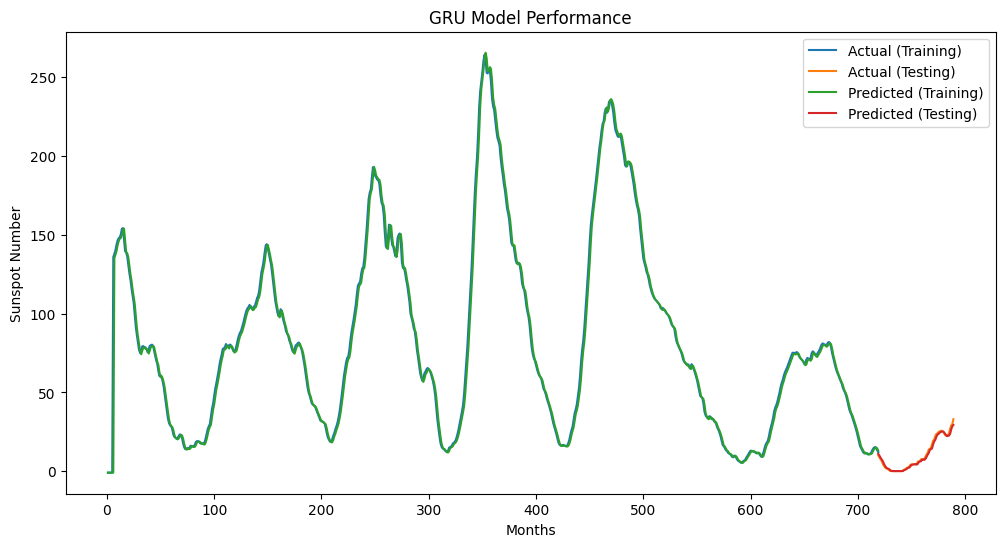

In [69]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import psutil

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
# data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
# url = 'https://www.sidc.be/SILSO/INFO/snmtotcsv.php'
url = 'https://www.sidc.be/SILSO/INFO/snmstotcsv.php'
data = pd.read_csv(url, delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the GRU model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for GRU
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build the GRU model
    model = Sequential()
    model.add(GRU(64, input_shape=(1, 1), return_sequences=True))
    model.add(GRU(64))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the GRU model
    start_time = time.time()
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    end_time = time.time()
    computation_time = end_time - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the GRU model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results
print("GRU Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print(f"Computation Time: {computation_time:.5f} seconds")

# Measure CPU usage and memory usage
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / (1024 * 1024)  # in MB

print(f"CPU Usage: {cpu_usage:.2f} MHz")
print(f"Memory Used: {memory_usage:.2f} MB")

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('GRU Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 08 - 10 GBM Model

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Machines (GBM) Model:
Train RMSE: 5.66445
Test RMSE: 11.30251
Train MAE: 2.68466
Test MAE: 7.01376
Train SMAPE: 2.82500
Test SMAPE: 34.06413
Train R2: 0.99146
Test R2: -0.29155
Computation Time: 0.33063 seconds

CPU Usage: 25.80000 MHz
Memory Used: 1707.69141 MB



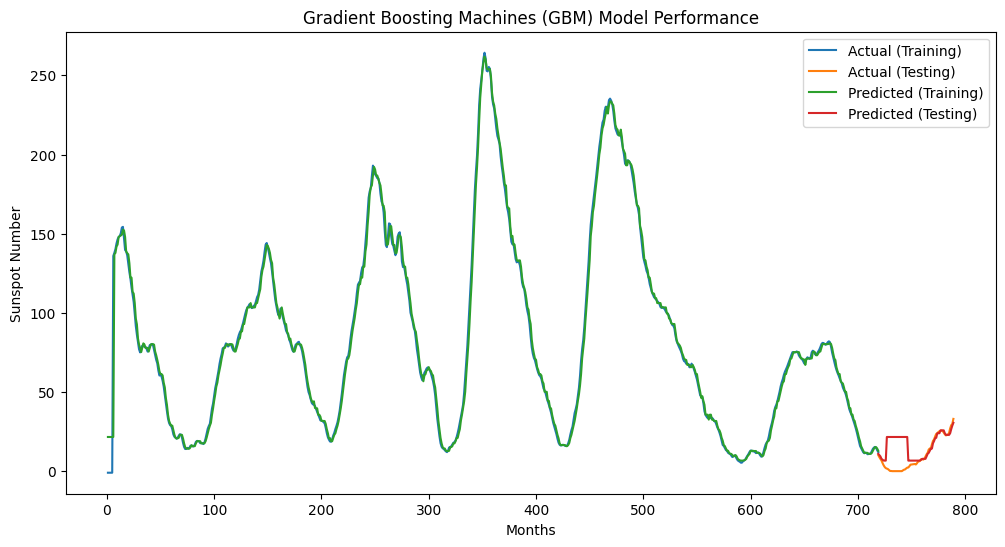

In [70]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import psutil

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
# data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
# url = 'https://www.sidc.be/SILSO/INFO/snmtotcsv.php'
url = 'https://www.sidc.be/SILSO/INFO/snmstotcsv.php'
data = pd.read_csv(url, delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the GBM model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the GBM model
    start_time = time.time()
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    end_time = time.time()
    computation_time = end_time - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the GBM model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results
print("Gradient Boosting Machines (GBM) Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print(f"Computation Time: {computation_time:.5f} seconds")
print()

# Measure CPU usage and memory usage
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / (1024 * 1024)  # in MB

print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Gradient Boosting Machines (GBM) Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 09 - 10 RF Model

<ipython-input-71-bf7148ac5073>:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Random Forest Model:
Train RMSE: 5.12198
Test RMSE: 11.13737
Train MAE: 1.84884
Test MAE: 6.84964
Train SMAPE: 4.24200
Test SMAPE: 66.63402
Train R2: 0.99302
Test R2: -0.25409
Computation Time: 0.34717 seconds

CPU Usage: 78.20000 MHz
Memory Used: 1798.75000 MB



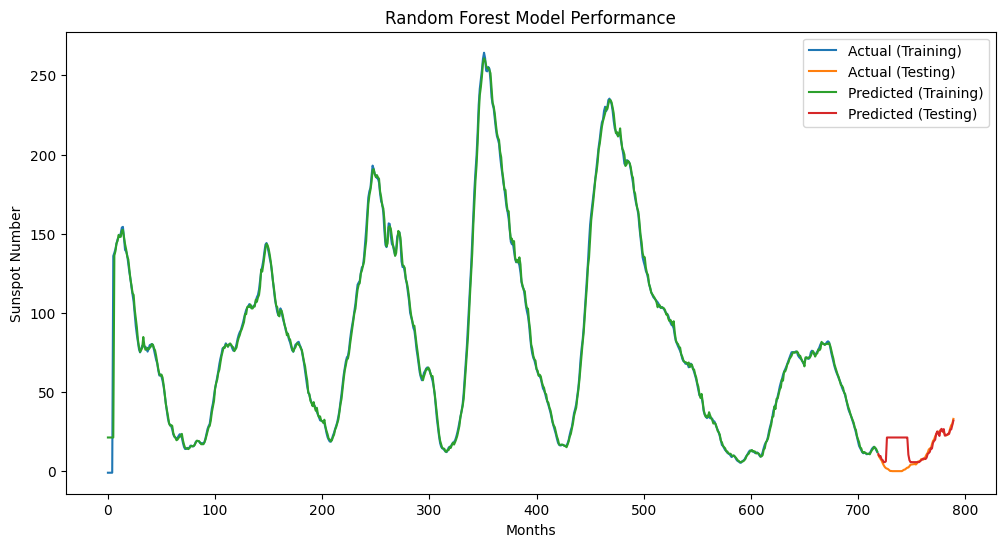

In [71]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import psutil

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
# data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
# url = 'https://www.sidc.be/SILSO/INFO/snmtotcsv.php'
url = 'https://www.sidc.be/SILSO/INFO/snmstotcsv.php'
data = pd.read_csv(url, delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Random Forest model
def train_evaluate_model(train_data, test_data):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Train the Random Forest model
    start_time = time.time()
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    end_time = time.time()
    computation_time = end_time - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / ((y_train + train_predictions) / 2))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / ((y_test + test_predictions) / 2))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the Random Forest model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, computation_time, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Print the results
print("Random Forest Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print(f"Computation Time: {computation_time:.5f} seconds")
print()

# Measure CPU usage and memory usage
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / (1024 * 1024)  # in MB

print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(len(y_train)), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('Random Forest Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


# 10 - 10 ETS

ETS Model:
Train RMSE: 5.84712
Test RMSE: 20.52078
Train MAE: 2.25527
Test MAE: 15.03394
Train SMAPE: 3.10238
Test SMAPE: 179.63735
Train R2: 0.99092
Test R2: -3.31696

System Information:
Execution Time: 0.60669 seconds
CPU Usage: 48.10000 MHz
Memory Used: 1847.97656 MB



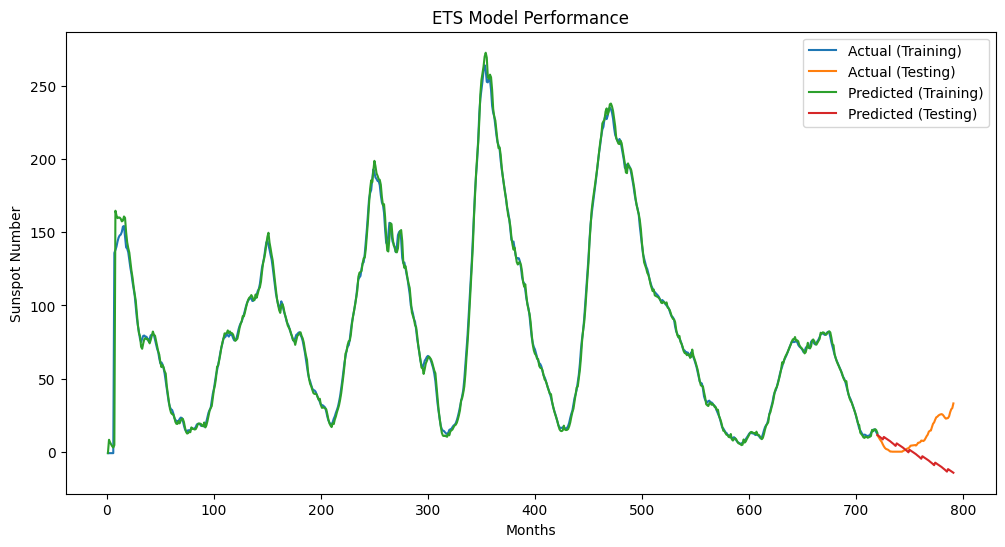

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import psutil
import time

# Set a random seed for reproducibility
np.random.seed(42)

# Load the data
# data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
# url = 'https://www.sidc.be/SILSO/INFO/snmtotcsv.php'
url = 'https://www.sidc.be/SILSO/INFO/snmstotcsv.php'
data = pd.read_csv(url, delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number']

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the ETS model
def train_evaluate_model(train_data, test_data):
    # Fit the ETS model
    model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
    start_time = time.time()
    model_fit = model.fit()
    end_time = time.time()
    execution_time = end_time - start_time

    # Make predictions
    train_predictions = model_fit.predict(start=0, end=len(train_data) - 1)
    test_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(train_data.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(test_data.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, execution_time, y_train, train_predictions, y_test, test_predictions

# Train and evaluate the ETS model
train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, execution_time, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(train_data, test_data)

# Calculate CPU usage and memory usage
cpu_usage = psutil.cpu_percent()
memory_usage = psutil.virtual_memory().used / 1024 / 1024

# Print the results
print("ETS Model:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Train MAE: {train_mae:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Train SMAPE: {train_smape:.5f}")
print(f"Test SMAPE: {test_smape:.5f}")
print(f"Train R2: {train_r2:.5f}")
print(f"Test R2: {test_r2:.5f}")
print()

# Print system information
print("System Information:")
print(f"Execution Time: {execution_time:.5f} seconds")
print(f"CPU Usage: {cpu_usage:.5f} MHz")
print(f"Memory Used: {memory_usage:.5f} MB")
print()

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
plt.title('ETS Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


In [73]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import r2_score
# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# import psutil
# import time

# # Set a random seed for reproducibility
# np.random.seed(42)

# # Load the data
# url = 'https://www.sidc.be/SILSO/INFO/snmtotcsv.php'
# data = pd.read_csv(url, delimiter=';', header=None)
# data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# # Select the 'Monthly Mean Total Sunspot Number' column as the target variable
# target = data['Monthly Mean Total Sunspot Number']

# # Normalize the target variable
# scaler = MinMaxScaler(feature_range=(0, 1))
# target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

# # Split the data into training and testing sets
# train_size = 720  # Number of months for training
# test_size = 72  # Number of months for testing

# train_data = target_scaled[:train_size]
# test_data = target_scaled[train_size:train_size+test_size]

# # Train and evaluate the ETS model
# def train_evaluate_model(train_data, test_data):
#     # Fit the ETS model
#     model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
#     start_time = time.time()
#     model_fit = model.fit()
#     end_time = time.time()
#     execution_time = end_time - start_time

#     # Make predictions
#     train_predictions = model_fit.predict(start=0, end=len(train_data) - 1)
#     test_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

#     # Invert the scaling
#     train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
#     y_train = scaler.inverse_transform(train_data.reshape(-1, 1))
#     test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
#     y_test = scaler.inverse_transform(test_data.reshape(-1, 1))

#     # Calculate RMSE
#     train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
#     test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

#     # Calculate MAE
#     train_mae = mean_absolute_error(y_train, train_predictions)
#     test_mae = mean_absolute_error(y_test, test_predictions)

#     # Calculate SMAPE
#     train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
#     test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

#     # Calculate R2
#     train_r2 = r2_score(y_train, train_predictions)
#     test_r2 = r2_score(y_test, test_predictions)

#     return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, execution_time

# # Train and evaluate the ETS model
# train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, execution_time = train_evaluate_model(train_data, test_data)

# # Calculate CPU usage and memory usage
# cpu_usage = psutil.cpu_percent()
# memory_usage = psutil.virtual_memory().used / 1024 / 1024

# # Create a dictionary with the results
# results = {
#     'Model': ['ETS'],
#     'Train RMSE': [train_rmse],
#     'Test RMSE': [test_rmse],
#     'Train MAE': [train_mae],
#     'Test MAE': [test_mae],
#     'Train SMAPE': [train_smape],
#     'Test SMAPE': [test_smape],
#     'Train R2': [train_r2],
#     'Test R2': [test_r2],
#     'Execution Time (seconds)': [execution_time],
#     'CPU Usage (MHz)': [cpu_usage],
#     'Memory Used (MB)': [memory_usage]
# }

# # Create a DataFrame from the results dictionary
# results_df = pd.DataFrame(results)

# # Display the results table


# # Plot the predictions
# plt.figure(figsize=(12, 6))
# plt.plot(range(1, len(y_train) + 1), y_train, label='Actual (Training)')
# plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual (Testing)')
# plt.plot(range(1, len(y_train) + 1), train_predictions, label='Predicted (Training)')
# plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted (Testing)')
# plt.title('ETS Model Performance')
# plt.xlabel('Months')
# plt.ylabel('Sunspot Number')
# plt.legend()
# plt.show()

# results_df

In [74]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import psutil
# import time
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.linear_model import LinearRegression
# from sklearn.svm import SVR
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.tree import DecisionTreeRegressor
# from statsmodels.tsa.holtwinters import ExponentialSmoothing


# # Set a random seed for reproducibility
# np.random.seed(42)

# # Load the data
# url = 'https://www.sidc.be/SILSO/INFO/snmtotcsv.php'
# data = pd.read_csv(url, delimiter=';', header=None)
# data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# # Select the 'Monthly Mean Total Sunspot Number' column as the target variable
# target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# # Normalize the target variable
# scaler = MinMaxScaler(feature_range=(0, 1))
# target_scaled = scaler.fit_transform(target)

# # Split the data into training and testing sets
# train_size = 720  # Number of months for training
# test_size = 72  # Number of months for testing

# train_data = target_scaled[:train_size]
# test_data = target_scaled[train_size:train_size+test_size]

# # Define a function to train and evaluate a model
# def train_evaluate_model(model, train_data, test_data):
#     X_train, y_train = train_data[:-1], train_data[1:]
#     X_test, y_test = test_data[:-1], test_data[1:]

#     # Train the model
#     model.fit(X_train, y_train)

#     # Make predictions
#     train_predictions = model.predict(X_train)
#     test_predictions = model.predict(X_test)

#     # Invert the scaling
#     train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
#     y_train = scaler.inverse_transform(y_train.reshape(-1, 1))  # Reshape y_train
#     test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
#     y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reshape y_test

#     # Calculate evaluation metrics
#     train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
#     test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
#     train_mae = mean_absolute_error(y_train, train_predictions)
#     test_mae = mean_absolute_error(y_test, test_predictions)
#     train_smape = 100 * np.mean(2 * np.abs(train_predictions - y_train) / (np.abs(y_train) + np.abs(train_predictions)))
#     test_smape = 100 * np.mean(2 * np.abs(test_predictions - y_test) / (np.abs(y_test) + np.abs(test_predictions)))
#     train_r2 = r2_score(y_train, train_predictions)
#     test_r2 = r2_score(y_test, test_predictions)

#     # Print evaluation metrics, execution time, CPU usage, and memory usage
#     print("Model:", type(model).__name__)
#     print("Train RMSE:", train_rmse)
#     print("Test RMSE:", test_rmse)
#     print("Train MAE:", train_mae)
#     print("Test MAE:", test_mae)
#     print("Train sMAPE:", train_smape)
#     print("Test sMAPE:", test_smape)
#     print("Train R^2:", train_r2)
#     print("Test R^2:", test_r2)

#     # Print execution time, CPU usage, and memory usage
#     process = psutil.Process()
#     print("Execution time:", time.process_time())
#     print("CPU usage:", process.cpu_percent())
#     print("Memory usage:", process.memory_info().rss)

#     # Plot the predictions
#     plt.figure(figsize=(12, 6))
#     plt.plot(y_train, label='Train')
#     plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Test')
#     plt.plot(range(len(y_train)), train_predictions, label='Train Predictions')
#     plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Test Predictions')
#     plt.xlabel('Time')
#     plt.ylabel('Sunspot Number')
#     plt.title(type(model).__name__)
#     plt.legend()
#     plt.show()


# # Linear Regression Model
# linear_model = LinearRegression()
# train_evaluate_model(linear_model, train_data, test_data)

# # Support Vector Regression Model
# svr_model = SVR()
# train_evaluate_model(svr_model, train_data, test_data)

# # AdaBoost Regression Model with Decision Tree Regressor as the base estimator
# base_model = DecisionTreeRegressor(max_depth=5)
# adaboost_model = AdaBoostRegressor(base_estimator=base_model)
# train_evaluate_model(adaboost_model, train_data, test_data)

# # RF Model
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# train_evaluate_model(rf_model, train_data, test_data)

# # GBR Model
# gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
# train_evaluate_model(gbr_model, train_data, test_data)

# # ETS Model
# ets_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
# train_evaluate_model(ets_model, train_data, test_data)